<a href="https://colab.research.google.com/github/MounicaSrinivasan163/Daily_water_level_reservoirs_India/blob/main/Daily_Reservoir_Level_Data_(CWC).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Daily Reservoir Level Data (CWC)

# Data Reading

In [32]:
import pandas as pd

df = pd.read_csv("/content/Daily_data_of_reservoir_level_of_Central_Water_Commission_(CWC)_Agency_during_March_2024.csv")
df

,Reservoir_name,Basin,Subbasin,Agency_name,Lat,Long,Date,Year,Month,Full_reservoir_level,Live_capacity_FRL,Storage,Level
0,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-01,2024,3,320.04,0.095,0.00810,303.505
1,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-02,2024,3,320.04,0.095,0.00755,303.352
2,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-03,2024,3,320.04,0.095,NaN,NaN
3,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-04,2024,3,320.04,0.095,0.00669,303.093
4,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,CWC,10.472668,76.974597,2024-03-05,2024,3,320.04,0.095,0.00621,302.941
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,CWC,17.303703,82.051441,2024-03-27,2024,3,86.56,0.508,NaN,NaN
3685,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,CWC,17.303703,82.051441,2024-03-28,2024,3,86.56,0.508,NaN,71.421
3686,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,CWC,17.303703,82.051441,2024-03-29,2024,3,86.56,0.508,NaN,NaN
3687,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,CWC,17.303703,82.051441,2024-03-30,2024,3,86.56,0.508,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reservoir_name        3689 non-null   object 
 1   Basin                 3689 non-null   object 
 2   Subbasin              3689 non-null   object 
 3   Agency_name           3689 non-null   object 
 4   Lat                   3689 non-null   float64
 5   Long                  3689 non-null   float64
 6   Date                  3689 non-null   object 
 7   Year                  3689 non-null   int64  
 8   Month                 3689 non-null   int64  
 9   Full_reservoir_level  3689 non-null   float64
 10  Live_capacity_FRL     3689 non-null   float64
 11  Storage               2578 non-null   float64
 12  Level                 2596 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 374.8+ KB


In [4]:
df.columns

Index(['Reservoir_name', 'Basin', 'Subbasin', 'Agency_name', 'Lat', 'Long',
       'Date', 'Year', 'Month', 'Full_reservoir_level', 'Live_capacity_FRL',
       'Storage', 'Level'],
      dtype='object')

In [5]:
df.select_dtypes(include='object').columns

Index(['Reservoir_name', 'Basin', 'Subbasin', 'Agency_name', 'Date'], dtype='object')

In [8]:
for i in df.columns:
  print(i,df[i].nunique())

Reservoir_name 119
Basin 19
Subbasin 53
Agency_name 1
Lat 119
Long 119
Date 31
Year 1
Month 1
Full_reservoir_level 118
Live_capacity_FRL 116
Storage 2070
Level 2231


# Data Preprocessing/cleaning

In [33]:
#since there are only one entry across Agency_name,Year and Month , we can drop them

df.drop(["Agency_name","Year", "Month"],axis=1,inplace=True)

In [34]:
df.duplicated().sum() #no duplicates found

np.int64(0)

In [35]:
df.isnull().sum()

,0
Reservoir_name,0
Basin,0
Subbasin,0
Lat,0
Long,0
Date,0
Full_reservoir_level,0
Live_capacity_FRL,0
Storage,1111
Level,1093


In [36]:
df["Storage"].fillna(df["Storage"].mean(),inplace=True)
df["Level"].fillna(df["Level"].mean(),inplace=True)
df

,Reservoir_name,Basin,Subbasin,Lat,Long,Date,Full_reservoir_level,Live_capacity_FRL,Storage,Level
0,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,10.472668,76.974597,2024-03-01,320.04,0.095,0.008100,303.505000
1,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,10.472668,76.974597,2024-03-02,320.04,0.095,0.007550,303.352000
2,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,10.472668,76.974597,2024-03-03,320.04,0.095,0.427417,408.343594
3,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,10.472668,76.974597,2024-03-04,320.04,0.095,0.006690,303.093000
4,Aliyar Reservoir,West flowing rivers from Tadri to Kanyakumari ...,Varrar and others,10.472668,76.974597,2024-03-05,320.04,0.095,0.006210,302.941000
...,...,...,...,...,...,...,...,...,...,...
3684,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,17.303703,82.051441,2024-03-27,86.56,0.508,0.427417,408.343594
3685,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,17.303703,82.051441,2024-03-28,86.56,0.508,0.427417,71.421000
3686,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,17.303703,82.051441,2024-03-29,86.56,0.508,0.427417,408.343594
3687,Yeleru,East flowing rivers between Mahanadi and Penna...,Nagvati and other,17.303703,82.051441,2024-03-30,86.56,0.508,0.427417,408.343594


In [37]:
df.isnull().sum()

,0
Reservoir_name,0
Basin,0
Subbasin,0
Lat,0
Long,0
Date,0
Full_reservoir_level,0
Live_capacity_FRL,0
Storage,0
Level,0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3689 entries, 0 to 3688
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reservoir_name        3689 non-null   object 
 1   Basin                 3689 non-null   object 
 2   Subbasin              3689 non-null   object 
 3   Lat                   3689 non-null   float64
 4   Long                  3689 non-null   float64
 5   Date                  3689 non-null   object 
 6   Full_reservoir_level  3689 non-null   float64
 7   Live_capacity_FRL     3689 non-null   float64
 8   Storage               3689 non-null   float64
 9   Level                 3689 non-null   float64
dtypes: float64(6), object(4)
memory usage: 288.3+ KB


In [39]:
df["Day"]=pd.to_datetime(df["Date"],format="%Y-%m-%d").dt.day
df["Day"]


,Day
0,1
1,2
2,3
3,4
4,5
...,...
3684,27
3685,28
3686,29
3687,30


In [40]:
df.drop("Date",axis=1,inplace=True)

# Pandas Analysis

In [67]:
#1. Find the day on which each reservoir recorded its maximum Storage in March 2024.
g_index=df.groupby("Reservoir_name")["Storage"].idxmax()
df.loc[g_index,["Reservoir_name","Day"]]

## or

def max_storage_day_first(group):
    max_row = group[group["Storage"] == group["Storage"].max()]
    return max_row.iloc[[0]][["Reservoir_name", "Day"]]  # Select only first match

df.groupby("Reservoir_name").apply(max_storage_day_first).reset_index(drop=True)




,Reservoir_name,Day
0,Aliyar Reservoir,3
1,Almatti Reservoir,1
2,Balimela Reservoir,6
3,Ban Sagar,7
4,Bargi\Rani Avanti Bai Sagar,1
...,...,...
114,Vagai Reservoir,29
115,Vanivilasa Sagar,19
116,Watrak,1
117,Yeldari Reservoir,1


In [68]:
# Compute the average Storage for each reservoir over the month.
df.groupby("Reservoir_name")["Storage"].mean()

,Storage
Reservoir_name,
Aliyar Reservoir,0.141549
Almatti Reservoir,0.706266
Balimela Reservoir,0.510783
Ban Sagar,0.768832
Bargi\Rani Avanti Bai Sagar,1.427137
...,...
Vagai Reservoir,0.160301
Vanivilasa Sagar,0.494829
Watrak,0.035839


In [90]:
#Identify reservoirs where the mean Level is greater than the monthly mean Level across all reservoirs.

g_df=df.groupby("Reservoir_name")["Level"].mean()
g_df[g_df>df["Level"].mean()].reset_index()

#or

# Step 1: Calculate overall mean
overall_mean = df["Level"].mean()

# Step 2: Filter rows where Level > overall mean
filtered_df = df[df["Level"] > overall_mean]

# Step 3: From that filtered DataFrame, select desired columns
result = filtered_df[["Reservoir_name", "Level"]]
result["Reservoir_name"].unique()


array(['Almatti Reservoir', 'Balimela Reservoir',
       'Bargi\\Rani Avanti Bai Sagar', 'Bhadra Reservoir', 'Bhandardara',
       'Bhatghar', 'Bhima\\Ujjani Reservoir', 'Dhom', 'Dudhawa',
       'Dudhganga', 'GhatPrabha\\Hidkal Reservoir',
       'Gobind Sagar-Bhakra Reservoir', 'Harangi Reservoir',
       'Hemavathy Reservoir', 'Idukki Reservoir', 'Isapur Reservoir',
       'Jayakwadi\\Nath Sagar', 'Kabini Reservoir', 'Kakki Reservoir',
       'Kanher Dam', 'Khadakwasla Reservoir', 'Kol Dam', 'Kolar',
       'Konar Reservoir', 'Koyana/Shivaji Sagar', 'Krishnaraja Sagar',
       'Linganamakki Reservoir', 'Machkund\\Jalaput Reservoir',
       'Malaprabha Reservoir', 'Mani Dam', 'Manikdoh', 'Mula Reservoir',
       'Mulshi Dam', 'Narayanapura Reservoir', 'Niradevghar',
       'Nizam sagar', 'Parambikulam Reservoir',
       'Pench\\Totladoh Reservoir', 'Periyar Reservoir',
       'Sanjay Sarovar (Upper Wainganga)', 'Sholayar Reservoir', 'Singur',
       'Supa Reservoir', 'Tattihalla', 'T

In [91]:
#List the top 5 reservoirs with the highest Live_capacity_FRL
df.sort_values(by="Live_capacity_FRL",ascending=False)[["Reservoir_name","Live_capacity_FRL"]].head(5)

,Reservoir_name,Live_capacity_FRL
1018,Indira Sagar,9.745
1002,Indira Sagar,9.745
997,Indira Sagar,9.745
1022,Indira Sagar,9.745
1021,Indira Sagar,9.745


In [93]:
#Group by Basin and get the total and average Storage.
df.groupby("Basin")["Storage"].agg(Total='sum', Average='mean').reset_index()


,Basin,Total,Average
0,Barak and Others Basin,12.136258,0.391492
1,Brahamaputra Basin,5.840000,0.188387
2,Brahmani and Baitarni Basin,35.065829,0.565578
3,Cauvery Basin,49.457538,0.265901
4,East flowing rivers between Mahanadi and Penna...,12.423902,0.400771
5,East flowing rivers between Pennar and Kanyaku...,4.969341,0.160301
6,Ganga Basin,237.956485,0.451530
7,Godavari Basin,198.429553,0.400060
8,Indus (Up to border) Basin,106.157158,0.856106
9,Krishna Basin,261.033925,0.400974


In [94]:
#Identify any reservoirs where the Level did not change throughout the month.

df.groupby("Reservoir_name").filter(lambda x: x["Level"].nunique() == 1)[["Reservoir_name","Level"]]

,Reservoir_name,Level


In [99]:
#For a selected reservoir (e.g., "Aliyar Reservoir"), calculate the daily difference in Storage.
df[df["Reservoir_name"]=="Aliyar Reservoir"]["Storage"].diff()

#or

aliy_df = df[df["Reservoir_name"] == "Aliyar Reservoir"].copy()
aliy_df["Daily_Storage_Change"] = aliy_df["Storage"].diff()
aliy_df[["Day", "Storage", "Daily_Storage_Change"]]



,Day,Storage,Daily_Storage_Change
0,1,0.008100,NaN
1,2,0.007550,-0.000550
2,3,0.427417,0.419867
3,4,0.006690,-0.420727
4,5,0.006210,-0.000480
5,6,0.006010,-0.000200
6,7,0.005820,-0.000190
7,8,0.005630,-0.000190
8,9,0.005390,-0.000240
9,10,0.006300,0.000910


In [100]:
 #What is the geographical bounding box (min/max latitude & longitude) of all reservoirs?
 df.groupby("Reservoir_name")["Lat"].agg(min='min', max='max').reset_index()

,Reservoir_name,min,max
0,Aliyar Reservoir,10.472668,10.472668
1,Almatti Reservoir,16.346793,16.346793
2,Balimela Reservoir,18.224944,18.224944
3,Ban Sagar,24.111612,24.111612
4,Bargi\Rani Avanti Bai Sagar,22.838462,22.838462
...,...,...,...
114,Vagai Reservoir,10.052779,10.052779
115,Vanivilasa Sagar,13.843436,13.843436
116,Watrak,23.329798,23.329798
117,Yeldari Reservoir,19.752023,19.752023


In [101]:
# Flag any reservoir-day where Storage exceeds Live_capacity_FRL (data error or anomaly).
df[df["Storage"]>df["Live_capacity_FRL"]][["Reservoir_name","Day"]]



,Reservoir_name,Day
2,Aliyar Reservoir,3
11,Aliyar Reservoir,12
23,Aliyar Reservoir,24
24,Aliyar Reservoir,25
25,Aliyar Reservoir,26
...,...,...
3532,Urmodi,30
3533,Urmodi,31
3562,Vagai Reservoir,29
3563,Vagai Reservoir,30


In [103]:
#Get count of such anomalies per reservoir:
df[df["Storage"] > df["Live_capacity_FRL"]]["Reservoir_name"].value_counts()
df[df["Storage"] > df["Live_capacity_FRL"]]["Reservoir_name"].value_counts().sum()

np.int64(390)

In [106]:
# Rank all reservoirs within each Basin by average Level and average Storage during the month.

#Compute average Level and Storage per Reservoir within each Basin
agg_df = df.groupby(["Basin", "Reservoir_name"]).agg(
    Avg_Level=("Level", "mean"),
    Avg_Storage=("Storage", "mean")
).reset_index()

agg_df["Level_Rank"] = agg_df.groupby("Basin")["Avg_Level"].rank(ascending=False, method='dense')
agg_df["Storage_Rank"] = agg_df.groupby("Basin")["Avg_Storage"].rank(ascending=False, method='dense')

agg_df.sort_values(["Basin", "Level_Rank"])



,Basin,Reservoir_name,Avg_Level,Avg_Storage
0,Barak and Others Basin,Gumti Reservoir,367.233131,0.391492
1,Brahamaputra Basin,Doyang Hep,308.761290,0.188387
2,Brahmani and Baitarni Basin,Rengali Reservoir,361.809144,0.721756
3,Brahmani and Baitarni Basin,Salandi Reservoir,365.179905,0.409400
4,Cauvery Basin,Harangi Reservoir,862.420258,0.072536
...,...,...,...,...
114,West flowing rivers of Kutch and Saurashtra in...,Dantiwada Reservoir,176.658387,0.166356
115,West flowing rivers of Kutch and Saurashtra in...,Machhu I,372.368937,0.374482
116,West flowing rivers of Kutch and Saurashtra in...,Machhu II,362.564421,0.376073
117,West flowing rivers of Kutch and Saurashtra in...,Shetrunji Reservoir,52.488710,0.162288


In [107]:
#MultiIndex Pivot Table - Create a MultiIndex pivot table with:Reservoir_name as rows,Day as columns,Values: Storage

pd.pivot_table(df,index="Reservoir_name",columns="Day",values="Storage")



Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Reservoir_name,,,,,,,,,,,,,,,,,,,,,
Aliyar Reservoir,0.008100,0.007550,0.427417,0.006690,0.006210,0.006010,0.005820,0.005630,0.005390,0.006300,...,0.000850,0.000230,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417
Almatti Reservoir,0.880000,0.876000,0.872000,0.868000,0.864000,0.859000,0.841000,0.818000,0.793000,0.767000,...,0.676000,0.672000,0.668000,0.665000,0.656000,0.647000,0.638000,0.630000,0.621000,0.613000
Balimela Reservoir,0.427417,0.427417,0.427417,0.427417,0.427417,1.099000,0.427417,0.427417,0.427417,0.427417,...,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,1.034000,0.427417,0.427417,0.427417
Ban Sagar,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,3.283200,0.427417,0.427417,0.427417,...,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,2.899690,0.427417,0.427417,0.427417
Bargi\Rani Avanti Bai Sagar,1.908000,1.897500,1.897500,1.887000,1.887000,1.876500,1.876500,1.866000,1.866000,1.855500,...,0.427417,0.427417,0.427417,0.427417,0.427417,0.427417,1.700000,0.427417,0.427417,0.427417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vagai Reservoir,0.151540,0.152140,0.148340,0.144260,0.140330,0.136220,0.131910,0.131520,0.131520,0.133360,...,0.127410,0.124180,0.122060,0.120130,0.117810,0.115460,0.115860,0.427417,0.427417,0.427417
Vanivilasa Sagar,0.510180,0.508480,0.506780,0.505080,0.503380,0.501680,0.499980,0.498280,0.496530,0.494830,...,0.474430,0.472730,0.471030,0.469330,0.467630,0.465930,0.464230,0.462530,0.460830,0.459130
Watrak,0.041090,0.040700,0.040310,0.040050,0.039650,0.039130,0.038600,0.038210,0.037820,0.037420,...,0.033450,0.033230,0.033120,0.033120,0.033010,0.032900,0.032800,0.034470,0.032140,0.031700


# Encoding

In [20]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()

for i in df.select_dtypes(include="object").columns:
  df[i]=oe.fit_transform(df[[i]])

df

,Reservoir_name,Basin,Subbasin,Lat,Long,Full_reservoir_level,Live_capacity_FRL,Storage,Level,Day
0,0.0,16.0,48.0,10.472668,76.974597,320.04,0.095,0.008100,303.505000,1
1,0.0,16.0,48.0,10.472668,76.974597,320.04,0.095,0.007550,303.352000,2
2,0.0,16.0,48.0,10.472668,76.974597,320.04,0.095,0.427417,408.343594,3
3,0.0,16.0,48.0,10.472668,76.974597,320.04,0.095,0.006690,303.093000,4
4,0.0,16.0,48.0,10.472668,76.974597,320.04,0.095,0.006210,302.941000,5
...,...,...,...,...,...,...,...,...,...,...
3684,118.0,4.0,26.0,17.303703,82.051441,86.56,0.508,0.427417,408.343594,27
3685,118.0,4.0,26.0,17.303703,82.051441,86.56,0.508,0.427417,71.421000,28
3686,118.0,4.0,26.0,17.303703,82.051441,86.56,0.508,0.427417,408.343594,29
3687,118.0,4.0,26.0,17.303703,82.051441,86.56,0.508,0.427417,408.343594,30


# Correlation Analysis

In [21]:
df.corr()

,Reservoir_name,Basin,Subbasin,Lat,Long,Full_reservoir_level,Live_capacity_FRL,Storage,Level,Day
Reservoir_name,1.000000e+00,-5.189975e-02,9.243392e-02,5.153698e-02,7.026338e-02,-2.638730e-02,-1.806265e-02,-0.021727,-0.042015,2.588830e-16
Basin,-5.189975e-02,1.000000e+00,3.768759e-01,-2.020484e-01,-5.835006e-01,-1.675082e-01,-8.676022e-02,-0.045786,-0.122657,2.296295e-17
Subbasin,9.243392e-02,3.768759e-01,1.000000e+00,-4.630337e-02,-1.446387e-01,-1.430159e-01,3.195747e-02,0.071262,-0.082290,4.784284e-17
Lat,5.153698e-02,-2.020484e-01,-4.630337e-02,1.000000e+00,1.800236e-01,-3.265979e-01,1.746133e-01,0.193091,-0.318237,4.736353e-18
Long,7.026338e-02,-5.835006e-01,-1.446387e-01,1.800236e-01,1.000000e+00,-1.394815e-01,4.206357e-02,0.039683,-0.171175,-5.297136e-17
Full_reservoir_level,-2.638730e-02,-1.675082e-01,-1.430159e-01,-3.265979e-01,-1.394815e-01,1.000000e+00,-6.493938e-02,-0.021668,0.820951,7.850541e-17
Live_capacity_FRL,-1.806265e-02,-8.676022e-02,3.195747e-02,1.746133e-01,4.206357e-02,-6.493938e-02,1.000000e+00,0.520294,-0.025436,9.500050e-17
Storage,-2.172684e-02,-4.578632e-02,7.126173e-02,1.930915e-01,3.968252e-02,-2.166790e-02,5.202943e-01,1.000000,-0.031348,-3.445800e-02
Level,-4.201528e-02,-1.226568e-01,-8.228994e-02,-3.182368e-01,-1.711746e-01,8.209511e-01,-2.543646e-02,-0.031348,1.000000,6.070787e-03
Day,2.588830e-16,2.296295e-17,4.784284e-17,4.736353e-18,-5.297136e-17,7.850541e-17,9.500050e-17,-0.034458,0.006071,1.000000e+00


In [ ]:
#INFERENCE FROM CORRELATION TEST:
#Here columns show some level of correlation with other columns.
#lets go ahead with Statistical test for further analysis

# **Statistical Analysis**

In [22]:
from scipy import stats

In [23]:
categories = [
    "Reservoir_name",
    "Basin",
    "Subbasin",
    "Day"
]

continuous = [
    "Lat",
    "Long",
    "Full_reservoir_level",
    "Live_capacity_FRL",
    "Storage",
    "Level"
]


In [24]:
#TWO SAMPLE T - TEST : continuous vs continuous
def two_sample(d1,d2):
  t=0
  f=0
  for i in  range(31):
    sample1=d1.sample(frac=0.03)
    sample2=d2.sample(frac=0.03)
    t_test,p_value=stats.ttest_ind(sample1,sample2)
    if p_value < 0.05:
      f=f+1
    else:
      t=t+1
  if t>f:
    return True
  else:
    return False


In [25]:
#CHI-SQUARE TEST - category vs category
def chisquare_cat_vs_cat(d1,d2):
    return True if stats.chi2_contingency(pd.crosstab(d1,d2))[1] < 0.05 else False

In [27]:
#ANNOVA TEST - continious vs category
def annova_test(d1,d2):
    group= df[d2].unique()
    data = {}
    for i in group:
        data[i]=df[d1][df[d2]==i]
    f_value,p_value=stats.f_oneway(*[i for i in data.values()])
    return False if p_value < 0.05 else True

In [28]:
#All the statistical test being done across all the columns
final = {}
for i in df.columns:
    final[i]={}
    for j in df.columns:
        if (i in continuous) and (j in continuous):
            result=two_sample(df[i],df[j])
        elif (i in continuous) and (j in categories):
            result=annova_test(i,j)
        elif (i in categories) and (j in continuous):
            result=annova_test(j,i)
        elif (i in categories) and (j in categories):
            result=chisquare_cat_vs_cat(df[i],df[j])
        if result:
            final[i][j]=1
        else:
            final[i][j]=0

In [29]:
#The result of the statistical test which was in a dictionary is put into a dataframe
final_df = pd.DataFrame(final)
final_df

,Reservoir_name,Basin,Subbasin,Lat,Long,Full_reservoir_level,Live_capacity_FRL,Storage,Level,Day
Reservoir_name,1,1,1,0,0,0,0,0,0,0
Basin,1,1,1,0,0,0,0,0,0,0
Subbasin,1,1,1,0,0,0,0,0,0,0
Lat,0,0,0,1,0,0,0,0,0,1
Long,0,0,0,0,1,0,0,0,0,1
Full_reservoir_level,0,0,0,0,0,1,0,0,1,1
Live_capacity_FRL,0,0,0,0,0,0,1,0,0,1
Storage,0,0,0,0,0,0,0,1,0,1
Level,0,0,0,0,0,1,0,0,1,1
Day,0,0,0,1,1,1,1,1,1,1


<Axes: >

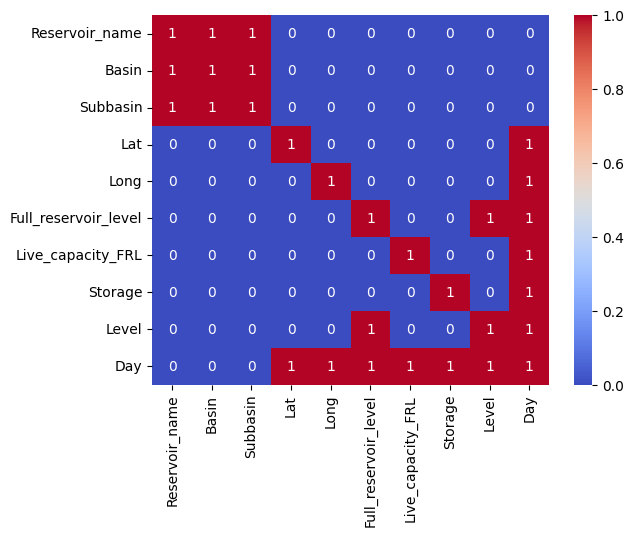

In [30]:
import seaborn as sns
#heatmap analysis for better visualisation of the stastical test results
sns.heatmap(final_df,annot=True,cmap="coolwarm")

In [ ]:
#INFERENCES:
#Though some columns showed minimal correlation, through statistical test we found it shows some significance.
# Yet some cloumn might show some significane in ML/Deep Learning considering the usecase of this project,we are going ahead without droping any columns